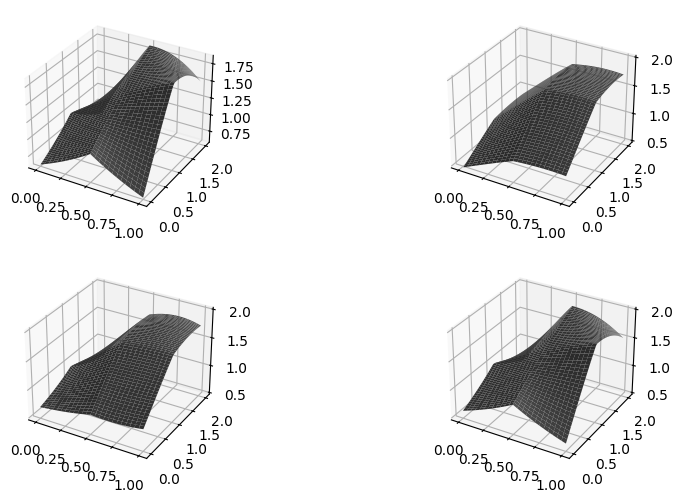

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 25)
t = np.linspace(0, 2, 50)

T, X = np.meshgrid(t, x)
f = np.exp(-np.abs((X - 0.5) * (T - 1))) + np.sin(X * T)
fig = plt.figure(figsize=(10, 6))

# Plot original function
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, T, f, color='gray')

# Perform SVD
u, s, vh = np.linalg.svd(f)

# Plot modal projections
for j in range(3):
    ff = np.dot(u[:, :j+1], np.dot(np.diag(s[:j+1]), vh[:j+1, :]))
    ax = fig.add_subplot(2, 2, j+2, projection='3d')
    ax.plot_surface(X, T, ff, color='gray')
    ax.set_zlim(0.5, 2)

plt.show()




In [2]:
sig = np.diag(s)
energy1 = sig[0] / np.sum(sig)
energy3 = np.sum(sig[:3]) / np.sum(sig)


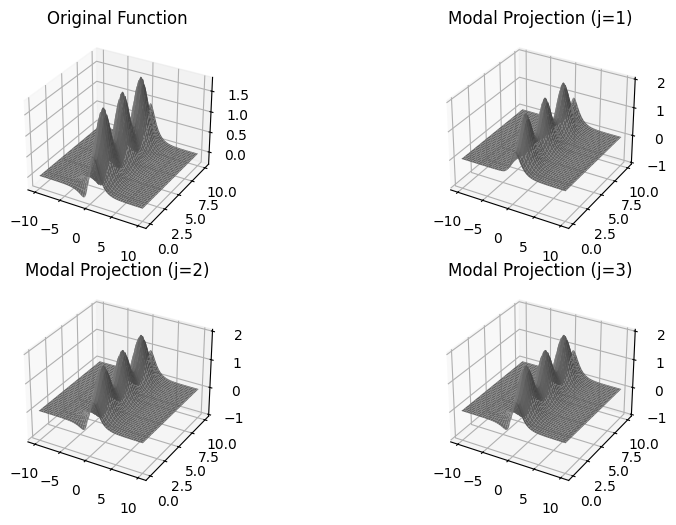

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create arrays x and t
x = np.linspace(-10, 10, 100)
t = np.linspace(0, 10, 80)

# Create meshgrid
X, T = np.meshgrid(x, t)

# Calculate function f
f = np.cosh(X) ** -1 * (1 - 0.5 * np.cos(2 * T)) + (np.cosh(X) ** -1 * np.tanh(X)) * (1 - 0.5 * np.sin(2 * T))

# Plot original function f
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, T, f, color='gray')
ax1.set_title("Original Function")

# Perform SVD
u, s, v = np.linalg.svd(f.T)

# Plot modal projections
for j in range(3):
    ff = np.dot(u[:, :j+1], np.dot(np.diag(s[:j+1]), v[:j+1, :]))
    ax = fig.add_subplot(2, 2, j+2, projection='3d')
    ax.plot_surface(X, T, ff.T, color='gray')
    ax.set_zlim(-1, 2)
    ax.set_title(f"Modal Projection (j={j+1})")

plt.show()


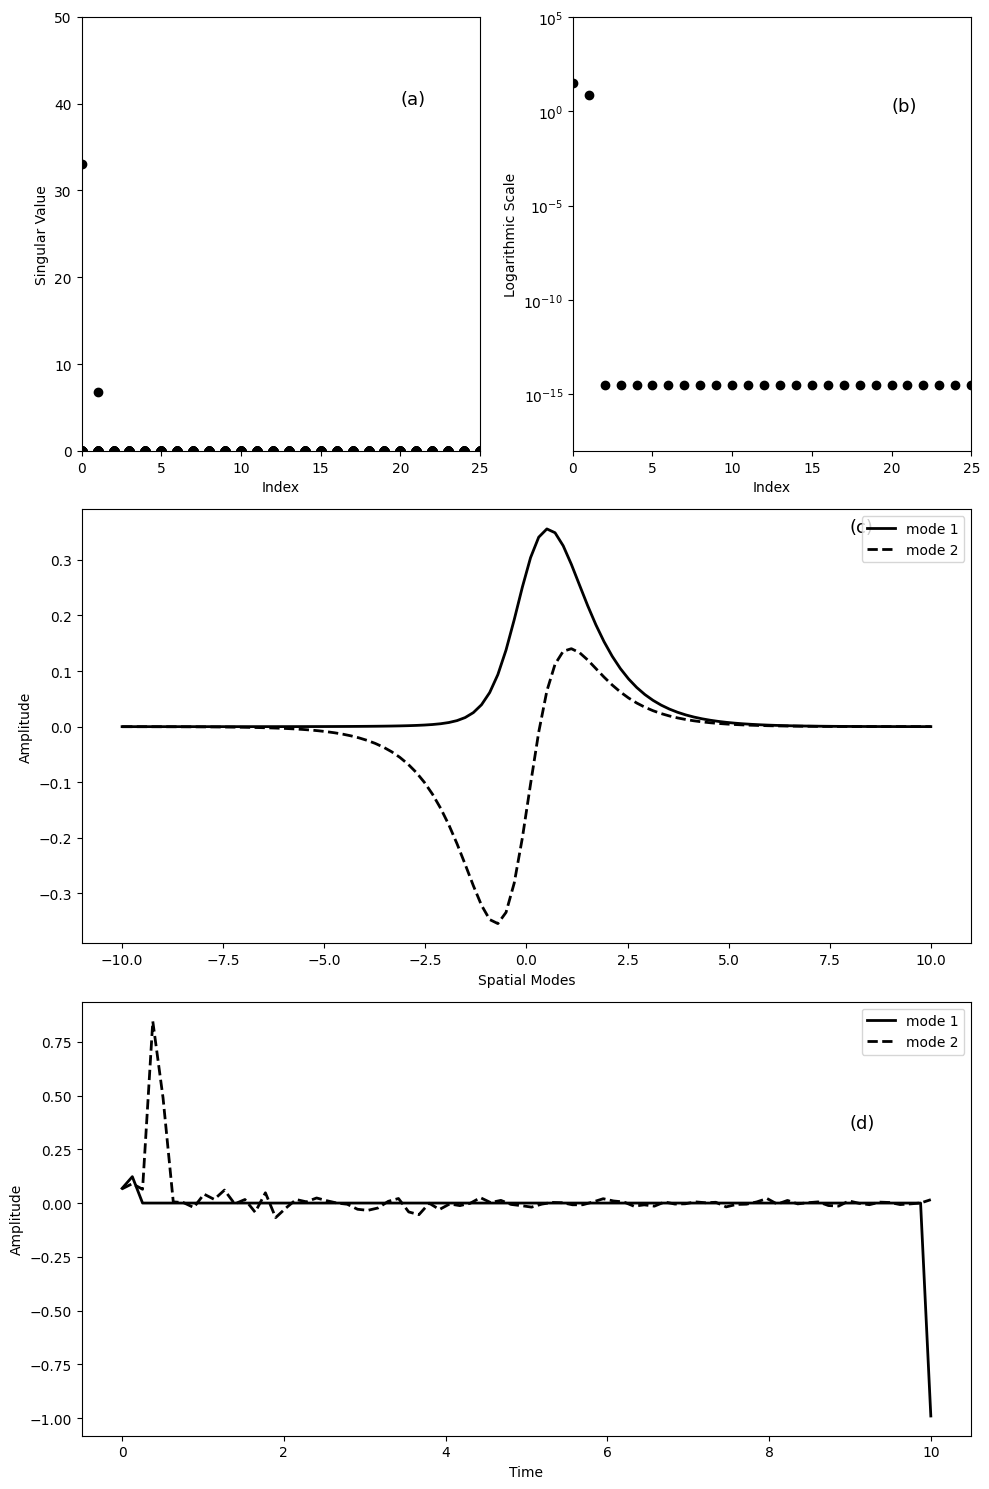

In [4]:
# Convert singular values to diagonal matrix
sig = np.diag(s)

# Plot singular values
plt.figure(figsize=(10, 15))

# Subplot (a)
plt.subplot(3, 2, 1)
plt.plot(sig, 'ko', linewidth=1.5)
plt.axis([0, 25, 0, 50])
plt.xticks(np.arange(0, 26, 5))
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.text(20, 40, '(a)', fontsize=13)

# Subplot (b)
plt.subplot(3, 2, 2)
plt.semilogy(sig, 'ko', linewidth=1.5)
plt.axis([0, 25, 10**(-18), 10**(5)])
plt.xticks(np.arange(0, 26, 5))
plt.yticks([10**(-15), 10**(-10), 10**(-5), 10**(0), 10**(5)])
plt.xlabel('Index')
plt.ylabel('Logarithmic Scale')
plt.text(20, 10**0, '(b)', fontsize=13)

# Calculate energy ratios
energy1 = sig[0] / np.sum(sig)
energy2 = np.sum(sig[:2]) / np.sum(sig)

# Subplot (c)
plt.subplot(3, 1, 2)
plt.plot(x, u[:, 0], 'k', label='mode 1', linewidth=2)
plt.plot(x, u[:, 1], 'k--', label='mode 2', linewidth=2)
plt.xlabel('Spatial Modes')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.text(8, 0.35, '(c)', fontsize=13)

# Subplot (d)
plt.subplot(3, 1, 3)
plt.plot(t, v[:, 0], 'k', label='mode 1', linewidth=2)
plt.plot(t, v[:, 1], 'k--', label='mode 2', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.text(9, 0.35, '(d)', fontsize=13)

plt.tight_layout()
plt.show()
